## Wood - Potato - Farmer - Bulder - Houses

In [1]:
import cvxpy as cvx
import numpy as np
import gurobipy
import matplotlib.pyplot as plt

In [56]:
def Make_Simple(Stages, Initial_state, Gradient, Costs):
    
    """
    Stages = Int
    
    Initial_state = [Houses, Farmers, Builders, Wood, Potato]
    Gradient      = [buildigs/Builder, peasants/houses, supply/houses, resources/farmer]
    Costs         = [Potato_costs, Wood_costs]
    costs         = [wood -> Houses, Potato-> Farmers and Builders]
                   
    """
    
    # Resources
    Potato               = cvx.Variable(Stages+1, name = 'Potato', pos = True)
    Wood                = cvx.Variable(Stages+1, name = 'Wood', pos = True)
    Raw_potato_production = cvx.Variable(Stages+1, name = 'Raw Potato Production', pos = True)
    Raw_wood_production = cvx.Variable(Stages+1, name = 'Raw Wood Production', pos = True)
    
    # Peasants
    Builders    = cvx.Variable(Stages+1, name = 'Builders', pos = True)
    Farmers  = cvx.Variable(Stages+1, name = 'Farmers', pos = True)
    
    # Structures
    Houses     = cvx.Variable(Stages+1, name = 'Houses', pos = True)
    
    # Army
    Army       = cvx.Variable(Stages+1, name = 'Army', pos = True)


    B  = cvx.Variable(Stages, name = 'Builders Production')
    F  = cvx.Variable(Stages, name = 'Farmers Production')
    H  = cvx.Variable(Stages, name = 'Houses Production')
    P  = cvx.Variable(Stages, name = 'Potato Production')
    W  = cvx.Variable(Stages, name = 'Wood Production')

    
    initial_farmers    = cvx.Parameter()
    initial_houses     = cvx.Parameter()
    initial_builders   = cvx.Parameter()
    initial_potato     = cvx.Parameter()
    initial_wood       = cvx.Parameter()
    
    buildings_builders = cvx.Parameter()
    peasants_houses    = cvx.Parameter()
    supplies_houses    = cvx.Parameter()
    resources_farmer   = cvx.Parameter()
    
    # Costs in Wood
    custo_wood_houses    = cvx.Parameter()
    
    # Costs in Potato
    custo_potato_farmers = cvx.Parameter()
    custo_potato_builders   = cvx.Parameter()
    
    # Initial State
    initial_houses, initial_farmers, initial_builders, initial_wood, initial_potato = Initial_state
    
    # Gradient
    buildings_Builders, peasants_houses, supplies_houses, resources_farmer          = Gradient
    
    # Costs
    Potato_costs, Wood_costs                    = Costs
    custo_wood_houses                           = Wood_costs
    custo_potato_farmers, custo_potato_builders = Potato_costs
    
    print('Initial Houses = ' + str(initial_houses))
    print('Initial Farmers = ' + str(initial_farmers))
    print('Initial Builders = ' + str(initial_builders))
    print('Initial Potato = ' + str(initial_potato))
    print('Initial Wood = ' + str(initial_wood) + '\n')
    
    Constraints = [Farmers[0]    == initial_farmers,
                   Houses[0]     == initial_houses,
                   Builders[0]   == initial_builders,
                   Army[0]       == initial_farmers + initial_builders,
                   Wood[0]       == initial_wood,
                   Potato[0]     == initial_potato,
        
                   B  >= 0,
                   F  >= 0,
                   H  >= 0,
                   P  >= 0,
                   W  >= 0]

    for i in range(Stages):

        Constraints.append(B[i] == Builders[i+1]  - Builders[i])
        Constraints.append(F[i] == Farmers[i+1]   - Farmers[i])
        Constraints.append(H[i] == Houses[i+1]    - Houses[i])
        Constraints.append(P[i] == Potato[i+1]    - Potato[i])
        Constraints.append(W[i] == Wood[i+1]      - Wood[i])

        Constraints.append(H[i] <= buildings_Builders*Builders[i])
        Constraints.append(B[i]  + F[i] <= peasants_houses*Houses[i])
        Constraints.append(Raw_potato_production[i] + 2*Raw_wood_production[i] == resources_farmer*Farmers[i])

        Constraints.append(Army[i+1] == Farmers[i] + Builders[i])
        Constraints.append(Army[i+1] <= Houses[i+1]*supplies_houses)
        

        Constraints.append(P[i] == Raw_potato_production[i]
                           - custo_potato_farmers*F[i]
                           - custo_potato_builders*B[i])

        Constraints.append(W[i] == Raw_wood_production[i]
                           - custo_wood_houses*H[i])
                           

        Constraints.append(Potato[i]  >= custo_potato_farmers*F[i]
                                       + custo_potato_builders*B[i])
                           
        Constraints.append(Wood[i]    >=  custo_wood_houses*H[i])


    F_obj = cvx.Maximize(Army[-1])
    
    return cvx.Problem(F_obj, Constraints)

In [57]:
def Make_SimpleInteger(Stages, Initial_state, Gradient, Costs):
    
    """
    Stages = Int
    
    Initial_state = [Houses, Farmers, Builders, Wood, Potato]
    Gradient      = [buildigs/Builder, peasants/houses, supply/houses, resources/farmer]
    Costs         = [Potato_costs, Wood_costs]
    costs         = [wood -> Houses, Potato-> Farmers and Builders]
                   
    """
    
    # Resources
    Potato               = cvx.Variable(Stages, name = 'Potato', integer = True)
    Wood                = cvx.Variable(Stages, name = 'Wood', integer = True)
    Raw_potato_production = cvx.Variable(Stages, name = 'Raw Potato Production', integer = True)
    Raw_wood_production = cvx.Variable(Stages, name = 'Raw Wood Production', integer = True)
    
    # Peasants
    Builders    = cvx.Variable(Stages, name = 'Builders', integer = True)
    Farmers  = cvx.Variable(Stages, name = 'Farmers', integer = True)
    
    # Structures
    Houses     = cvx.Variable(Stages, name = 'Houses', integer = True)

    # Army
    Army       = cvx.Variable(Stages, name = 'Army', integer = True)


    B  = cvx.Variable(Stages-1, name = 'Builders Production')
    F  = cvx.Variable(Stages-1, name = 'Farmers Production')
    H  = cvx.Variable(Stages-1, name = 'Houses Production')
    P  = cvx.Variable(Stages-1, name = 'Potato Production')
    W  = cvx.Variable(Stages-1, name = 'Wood Production')

    
    initial_farmers    = cvx.Parameter()
    initial_houses     = cvx.Parameter()
    initial_builders   = cvx.Parameter()
    initial_potato     = cvx.Parameter()
    initial_wood       = cvx.Parameter()
    
    buildings_builders = cvx.Parameter()
    peasants_houses    = cvx.Parameter()
    supplies_houses    = cvx.Parameter()
    resources_farmer   = cvx.Parameter()
    
    # Costs in Wood
    custo_wood_houses    = cvx.Parameter()
    
    # Costs in Potato
    custo_potato_farmers = cvx.Parameter()
    custo_potato_builders   = cvx.Parameter()
    
    # Initial State
    initial_houses, initial_farmers, initial_builders, initial_wood, initial_potato = Initial_state
    
    # Gradient
    buildings_Builders, peasants_houses, supplies_houses, resources_farmer          = Gradient
    
    # Costs
    Potato_costs, Wood_costs                    = Costs
    custo_wood_houses                           = Wood_costs
    custo_potato_farmers, custo_potato_builders = Potato_costs
    
    print('Initial Houses = ' + str(initial_houses))
    print('Initial Farmers = ' + str(initial_farmers))
    print('Initial Builders = ' + str(initial_builders))
    print('Initial Potato = ' + str(initial_potato))
    print('Initial Wood = ' + str(initial_wood) + '\n')
    
    Constraints = [Farmers[0]    == initial_farmers,
                   Houses[0]     == initial_houses,
                   Builders[0]   == initial_builders,
                   Army[0]       == initial_farmers + initial_builders,
                   Wood[0]       == initial_wood,
                   Potato[0]     == initial_potato,
                    Potato >= 0,
                    Wood >= 0,
                    Raw_potato_production >= 0,
                    Raw_wood_production >= 0,
                    Builders >= 0,
                    Farmers >= 0,
                    Houses  >= 0,
                    Army >= 0,
                   B  >= 0,
                   F  >= 0,
                   H  >= 0,
                   P  >= 0,
                   W  >= 0]

    for i in range(Stages-1):

        Constraints.append(B[i] == Builders[i+1]  - Builders[i])
        Constraints.append(F[i] == Farmers[i+1]   - Farmers[i])
        Constraints.append(H[i] == Houses[i+1]    - Houses[i])
        Constraints.append(P[i] == Potato[i+1]    - Potato[i])
        Constraints.append(W[i] == Wood[i+1]      - Wood[i])

        Constraints.append(H[i] <= buildings_Builders*Builders[i])
        Constraints.append(B[i]  + F[i] <= peasants_houses*Houses[i])
        Constraints.append(Raw_potato_production[i] + 2*Raw_wood_production[i] == resources_farmer*Farmers[i])

        Constraints.append(Army[i+1] == Farmers[i] + Builders[i])
        Constraints.append(Army[i+1] <= Houses[i+1]*supplies_houses)
        

        Constraints.append(P[i] == Raw_potato_production[i]
                           - custo_potato_farmers*F[i]
                           - custo_potato_builders*B[i])

        Constraints.append(W[i] == Raw_wood_production[i]
                           - custo_wood_houses*H[i])
                           

        Constraints.append(Potato[i]  >= custo_potato_farmers*F[i]
                                       + custo_potato_builders*B[i])
                           
        Constraints.append(Wood[i]    >=  custo_wood_houses*H[i])


    F_obj = cvx.Maximize(Army[-1])
    
    return cvx.Problem(F_obj, Constraints)

In [58]:
def Make_Simple_Plot(Stages, problem, save = False, Title = False, figname = False):

    Army, Farmers, Houses, Builders, Wood, Potato, BuilderProd, FarmerProd, HouseProd, PotatoProd, WoodProd, RPP, RWP = problem.variables()

################ Adjustments #########################################

    plt.figure(figsize=(12,8))
    plt.subplots_adjust(left=0.05, right=0.9, bottom = 0.4, top = 1.1,hspace = 0.4)
    
######################  First Plot  ##################################

    plt.subplot(231)
    plt.plot(Farmers.value[:Stages] + Builders.value[:Stages],'r--*', label='Army')
    plt.plot(Wood.value[:Stages] + Potato.value[:Stages],'b--', label='Resources')
    plt.plot(Houses.value[:Stages], label='Buildings')
    if Title:
        plt.title(Title)
    else:
        pass
    plt.grid(True)
    plt.xlabel('Stages')
    plt.legend()
    
######################  Second Plot  ##################################

    plt.subplot(232)
    plt.plot(Farmers.value[:Stages], 'o--', label='Farmers')
    plt.plot(Builders.value[:Stages],'b--', label='Builders')
    plt.plot(Houses.value[:Stages], label='Houses')
    if Title:
        plt.title(Title)
    else:
        plt.title(str(Stages - 1) + ' Estágios')
    plt.xlabel('Stages')
    plt.grid(True)
    plt.legend()


######################  Third Plot  ##################################

    plt.subplot(233)

    plt.plot(Wood.value[:Stages],  'o--', label='Wood')
    plt.plot(Potato.value[:Stages],'b--', label='Potato')
    plt.xlabel('Stages')

    plt.grid(True)

    plt.legend()
    
    
######################  Fourth Plot  ##################################

    plt.subplot(234)
    plt.plot(Farmers.value[:Stages] + Builders.value[:Stages],'r--*', label='Army')
    plt.plot(Wood.value[:Stages] + Potato.value[:Stages],'b--', label='Resources')
    plt.plot(Houses.value[:Stages], label='Buildings')
    if Title:
        pass #plt.title(Title)
    else:
        pass #plt.title(str(Stages - 1) + ' Estágios')
    plt.yscale('symlog')
    plt.grid(True)
    plt.xlabel('Stages')

    plt.legend()
    
    
######################  Fith Plot  ##################################

    plt.subplot(235)
    
    plt.plot(Farmers.value[:Stages], 'o--', label='Farmers')
    plt.plot(Builders.value[:Stages],'b--', label='Builders')
    plt.plot(Houses.value[:Stages], label='Houses')
    if Title:
        plt.title(Title + ' - Logscale')
    else:
        plt.title('Logscale')
    plt.yscale('symlog')
    plt.xlabel('Stages')

    plt.grid(True)
    plt.legend()
    
        
######################  Sixth Plot  ##################################


    plt.subplot(236)


    plt.plot(RPP.value[:Stages], label=RPP.name())
    plt.plot(RWP.value[:Stages], label=RWP.name())

    plt.xlabel('Stages')

    plt.grid(True)

    plt.legend()
    
#####################################################################

    if save:
        if figname:
            
            plt.savefig(figname, bbox_inches = 'tight',pad_inches = 0)
        else:
            mnum = np.random.rand() + 10*sum(initial_state)
            plt.savefig(str(Stages - 1)+'_Estagios_'+str(mnum), bbox_inches = 'tight', pad_inches = 0)

In [59]:
def Make_Integer_Simple_Plot(Stages, problem, save = False, Title = False, figname = False):

    Army, Farmers, Houses, Builders, Wood, Potato,RPP,RWP, BuilderProd, FarmerProd, HouseProd, PotatoProd, WoodProd = problem.variables()

################ Adjustments #########################################

    plt.figure(figsize=(16,10))
    plt.subplots_adjust(left=0.05, right=0.9, bottom = 0.4, top = 1.1,hspace = 0.4)
    
######################  First Plot  ##################################

    plt.subplot(231)
    plt.plot(Farmers.value[:Stages] + Builders.value[:Stages],'r--*', label='Army')
    plt.plot(Wood.value[:Stages] + Potato.value[:Stages],'b--', label='Resources')
    plt.plot(Houses.value[:Stages], label='Buildings')
    if Title:
        plt.title(Title)
    else:
        pass
    plt.grid(True)
    plt.xlabel('Stages')
    plt.legend()
    
######################  Second Plot  ##################################

    plt.subplot(232)
    plt.plot(Farmers.value[:Stages], 'o--', label='Farmers')
    plt.plot(Builders.value[:Stages],'b--', label='Builders')
    plt.plot(Houses.value[:Stages], label='Houses')
    if Title:
        plt.title(Title)
    else:
        plt.title(str(Stages - 1) + ' Estágios')
    plt.xlabel('Stages')
    plt.grid(True)
    plt.legend()


######################  Third Plot  ##################################

    plt.subplot(233)

    plt.plot(Wood.value[:Stages],  'o--', label='Wood')
    plt.plot(Potato.value[:Stages],'b--', label='Potato')
    plt.xlabel('Stages')

    plt.grid(True)

    plt.legend()
    
    
######################  Fourth Plot  ##################################

    plt.subplot(234)
    plt.plot(Farmers.value[:Stages] + Builders.value[:Stages],'r--*', label='Army')
    plt.plot(Wood.value[:Stages] + Potato.value[:Stages],'b--', label='Resources')
    plt.plot(Houses.value[:Stages], label='Buildings')
    if Title:
        pass #plt.title(Title)
    else:
        pass #plt.title(str(Stages - 1) + ' Estágios')
    plt.yscale('symlog')
    plt.grid(True)
    plt.xlabel('Stages')

    plt.legend()
    
    
######################  Fith Plot  ##################################

    plt.subplot(235)
    
    plt.plot(Farmers.value[:Stages], 'o--', label='Farmers')
    plt.plot(Builders.value[:Stages],'b--', label='Builders')
    plt.plot(Houses.value[:Stages], label='Houses')
    if Title:
        plt.title(Title + ' - Logscale')
    else:
        plt.title('Logscale')
    plt.yscale('symlog')
    plt.xlabel('Stages')

    plt.grid(True)
    plt.legend()
    
        
######################  Sixth Plot  ##################################


    plt.subplot(236)


    plt.plot(RPP.value[:Stages], label=RPP.name())
    plt.plot(RWP.value[:Stages], label=RWP.name())

    plt.xlabel('Stages')

    plt.grid(True)

    plt.legend()
    
#####################################################################

    if save:
        if figname:
            
            plt.savefig(figname, bbox_inches = 'tight',pad_inches = 0)
        else:
            mnum = np.random.rand() + 10*sum(initial_state)
            plt.savefig(str(Stages - 1)+'_Estagios_'+str(mnum), bbox_inches = 'tight', pad_inches = 0)

In [74]:
Imperio0 = [2,1,0,0,0]
Gradi    = [1, 1, 2, 3]
tatoco   = [3,6]
woodco   = [5]
Custos    = [tatoco, woodco]

In [75]:
ProblemTest = Make_Simple(31, Imperio0, Gradi, Custos)

Initial Houses = 2
Initial Farmers = 1
Initial Builders = 0
Initial Potato = 0
Initial Wood = 0



In [76]:
ProblemTest.solve(solver='GUROBI')

3378.376721068459

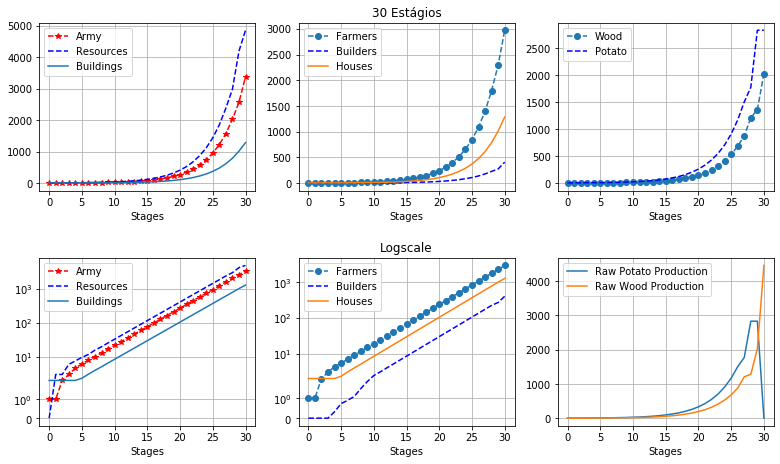

In [77]:
Make_Simple_Plot(31,ProblemTest, save = True, figname='simple_30_r')

In [8]:
Imperio0 = [3,1,1,0,0]
Gradi    = [1, 1, 2, 3]
tatoco   = [6,3]
woodco   = [5]
Custos    = [tatoco, woodco]

In [22]:
IntTest = Make_SimpleInteger(40, Imperio0, Gradi, Custos)

Initial Houses = 3
Initial Farmers = 1
Initial Builders = 1
Initial Potato = 0
Initial Wood = 0



In [23]:
IntTest.solve(solver='GUROBI')

6.0

In [11]:
IntTest.variables()[0].value, IntTest.variables()[0].name()

(array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 4., 4., 5., 6.]),
 'Army')

In [12]:
IntTest.variables()[4].value, IntTest.variables()[4].name()

(array([-0., -0.,  1.,  2.,  3.,  4.,  5.,  6.,  6.,  6.,  6.,  6.,  6.,
         6.,  6.,  6.]), 'Wood')

In [13]:
IntTest.variables()[5].value, IntTest.variables()[5].name()

(array([-0.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 12., 15., 15., 15., 18.,
        18., 18., 21.]), 'Potato')

In [14]:
IntTest.variables()[6].value, IntTest.variables()[6].name()

(array([3., 1., 1., 1., 1., 1., 1., 3., 3., 3., 3., 3., 3., 3., 3., 0.]),
 'Raw Potato Production')

In [15]:
IntTest.variables()[7].value, IntTest.variables()[7].name()

(array([ 0.,  1.,  1.,  1.,  1.,  1.,  1., -0., -0., -0., -0., -0., -0.,
        -0., -0.,  0.]), 'Raw Wood Production')

In [18]:
for i in IntTest.variables():
    print(i)

Army
Farmers
Houses
Builders
Wood
Potato
Raw Potato Production
Raw Wood Production
Builders Production
Farmers Production
Houses Production
Potato Production
Wood Production


In [19]:
for i in ProblemTest.variables():
    print(i)

Army
Farmers
Houses
Builders
Wood
Potato
Builders Production
Farmers Production
Houses Production
Potato Production
Wood Production
Raw Potato Production
Raw Wood Production


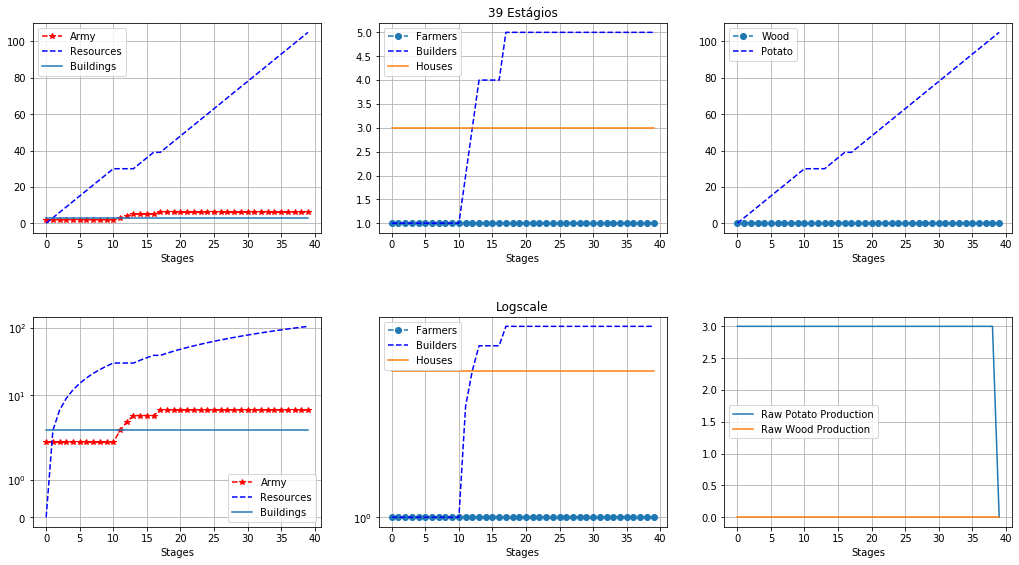

In [24]:
Make_Integer_Simple_Plot(40, IntTest, save = True, figname = 'simple302')

In [17]:
def get_next_empire(old_empire):
    
    Army, Farmers, Houses, Builders, Wood, Potato, BuilderProd, FarmerProd, HouseProd, PotatoProd, WoodProd, RPP, RWP = problem.variables()
    
    
    new = [ ]
    
    new += []
    
    return new
